In [28]:
import pandas as pd
import numpy as np

In [29]:
raw = pd.read_csv('bills93-114.csv', sep=";", encoding='latin-1')

In [30]:
df = raw[['BillID','PassH','Title']]

In [89]:
df.tail()

,BillID,PassH,Title
294519,114-SRES-638,0,A resolution recognizing the 75th anniversary ...
294520,114-SRES-639,0,"A resolution designating December 17, 2016, as..."
294521,114-SRES-640,0,A resolution recognizing the death of John Gle...
294522,114-SRES-641,0,A resolution celebrating the 200th anniversary...
294523,114-SRES-642,0,A resolution authorizing taking pictures and f...


In [37]:
df['PassH'].value_counts()

0    265312
1     29212
Name: PassH, dtype: int64

# Wordcloud Exploration

In [110]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.add("concurrent")
stopwords.add("resolution")
stopwords.add("recognizing")
stopwords.add("providing")
stopwords.add("provide")
stopwords.add("bill")
stopwords.add("congressional")
stopwords.add("authorizing")
stopwords.add("authorize")
stopwords.add("designating")
stopwords.add("designate")
stopwords.add("printi")

In [111]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords, 
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


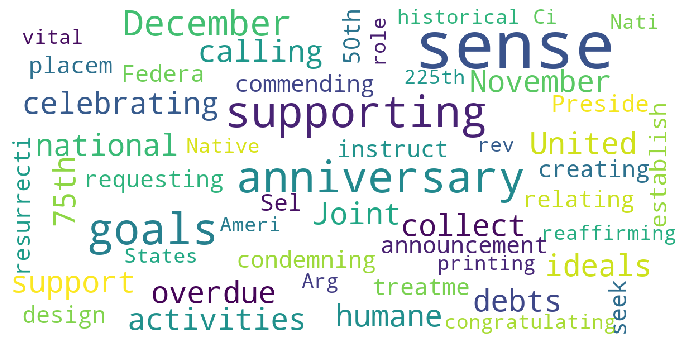

In [112]:
show_wordcloud(df[df['PassH']==0]['Title'])

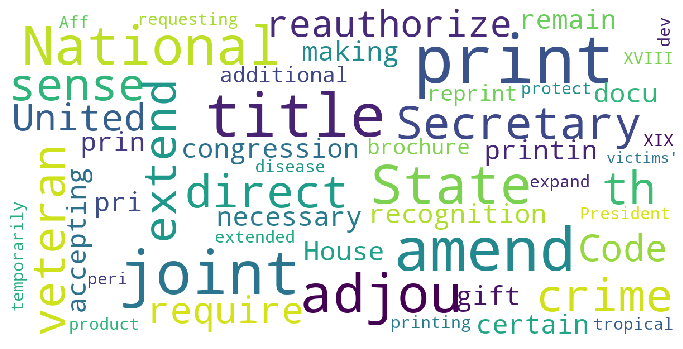

In [113]:
show_wordcloud(df[df['PassH']==1]['Title'])

In [ ]:
#Wordcloud on difference of frequencies

# Topic Modeling

In [114]:
from sklearn.model_selection import train_test_split

X = df['Title']
y = df['PassH']